## Timeline graph


In [297]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
import os
import contextily as cx
# Import libraries for data visualization
import matplotlib.pyplot as plt
import matplotlib as mplt
# for line
from shapely.geometry import Point, LineString, Polygon
import fiona
from mycolorpy import colorlist as mcp
# Slightly advanced library for data visualization            
import seaborn as sns    

# Import necessary modules
import geopandas as gpd

import pycountry_convert as pc


## Loading the data

In [298]:
# Importing damaged data
# dmg_roanu = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\housing damages sidr.xlsx', sheet_name= 'Roanu', dtype={
#     'District': 'string',
#     'District corrected': 'string',
#     'ID_adm': 'string',
#     'District Total Population 2007 est.': 'int64',
#     'Total Households': 'int64',
#     'Total Vulnerable Households': 'int64',
#     'Fully Damaged Households': 'int64',
#     'Partially Damaged Households': 'int64',
#     'Fully Damaged Vulnerable Households': 'int64',
#     'Partially Damaged Vulnerable Households': 'int64',
#     'Fully Damaged Non vulnerable Households': 'int64',
#     'Partially Damaged Non Vulnerable Households': 'int64'
# })





dmg_roanu = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\cyclone damages.xlsx', sheet_name= 'Roanu', dtype={
    'Name of District defaut': 'string',
    'District corrected': 'string',
    'ID_adm':'string',
    'No. Of Affected Upazilas': 'int64',
    'No. Of Affected Unions': 'int64',
    'affected area (km2)': 'int64',
    'Causality': 'int64',
    'Fully affected HH': 'string',
    'Partially affected HH': 'int64',
    'Affected HH': 'int64',
    'Fully affected people': 'string',
    'Partially affected people': 'int64',
    'Fully affected shelter': 'int64',
    'Partially affected shelter': 'int64'
})





dmg_komen = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\cyclone damages.xlsx', sheet_name= 'Komen', dtype={
    'Name of District defaut': 'string',
    'District corrected': 'string',
    'ID_adm':'string',
    'Affected HH': 'int64',
    'Affected people': 'int64',
    'Fully damaged houses': 'int64',
    'Partially damaged houses': 'int64'
})

dmg_mora = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\cyclone damages.xlsx', sheet_name= 'Mora', dtype={
    'Name of District defaut': 'string',
    'District corrected': 'string',
    'ID_adm':'string',
    'Number of fully damaged house': 'int64',
    'Number of partially damaged house': 'int64',
    'Total number of damaged house': 'int64',
    'Nbr affected people': 'int64'
})

# Importing the bangladesh raw map
bgd_adm = gpd.read_file(os.getcwd() + '\\input\\shapefile_data\\shapefile_zip\\BGD_adm\\BGD_adm2.shp')


path_roanu = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\cyclone eye.xlsx', sheet_name= 'Roanu', dtype={
    'SEASON': 'string',
    'BASIN': 'string',
    'SUBBASIN':'string',
    'ISO_TIME': 'string',
    'NATURE': 'string',
    'PART': 'string',
    'LAT': 'float',
    'LON': 'float',
    'WMO WIND': 'float',
    'WMO PRES': 'float',
    'WHO AGENCY': 'string',
    'DIST2LAND': 'int64',
    'LANDFALL': 'float',
    'IFLAG': 'string',
    'USA AGENCY': 'string',
    'USA ATCF_ID':'string',
    'USA LAT':'float',
    'USA LON':'float',
    'USA STATUS':'string',
    'USA WIND':'float',
    'USA PRES':'float',
    'USA SSHS':'float',

    "USA R34":'string',	
    "USA R50":'string',	
    "USA POCI":'float',	
    'USA ROCI':'float',	
    'USA RMW':'float',	
    "NEWDELHI LAT":'float',	
    'NEWDELHI LON':'float',	
    'NEWDELHI GRADE':'string',	
    'NEWDELHI WIND':'float',
    'NEWDELHI PRES':'float',	
    'NEWDELHI CI':'float',	
    'NEWDELHI DP':'float',	
    'STORM SPEED':'float',	
    'STORM DIR':'int64'

})



path_komen = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\cyclone eye.xlsx', sheet_name= 'Komen', dtype={
    'SEASON': 'string',
    'BASIN': 'string',
    'SUBBASIN':'string',
    'ISO_TIME': 'string',
    'NATURE': 'string',
    'PART': 'string',
    'LAT': 'float',
    'LON': 'float',
    'WMO WIND': 'float',
    'WMO PRES': 'float',
    'WHO AGENCY': 'string',
    'DIST2LAND': 'int64',
    'LANDFALL': 'float',
    'IFLAG': 'string',
    'USA AGENCY': 'string',
    'USA ATCF_ID':'string',
    'USA LAT':'float',
    'USA LON':'float',
    'USA STATUS':'string',
    'USA WIND':'float',
    'USA PRES':'float',
    'USA SSHS':'float',

    "USA R34":'string',	
    "USA POCI":'float',	
    'USA ROCI':'float',	
    'USA RMW':'float',	
    "NEWDELHI LAT":'float',	
    'NEWDELHI LON':'float',	
    'NEWDELHI GRADE':'string',	
    'NEWDELHI WIND':'float',
    'NEWDELHI PRES':'float',	
    'NEWDELHI CI':'float',	
    'NEWDELHI DP':'float',	
    'STORM SPEED':'float',	
    'STORM DIR':'int64'

})


path_mora = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\cyclone eye.xlsx', sheet_name= 'Mora', dtype={
    'SEASON': 'string',
    'BASIN': 'string',
    'SUBBASIN':'string',
    'ISO_TIME': 'string',
    'NATURE': 'string',
    'PART': 'string',
    'LAT': 'float',
    'LON': 'float',
    'WMO WIND': 'float',
    'WMO PRES': 'float',
    'WHO AGENCY': 'string',
    'DIST2LAND': 'int64',
    'LANDFALL': 'float',
    'IFLAG': 'string',
    'USA AGENCY': 'string',
    'USA ATCF_ID':'string',
    'USA LAT':'float',
    'USA LON':'float',
    'USA STATUS':'string',
    'USA WIND':'float',
    'USA PRES':'float',
    'USA SSHS':'float',

    "USA R34":'string',	
    "USA R50":'string',	
    "USA POCI":'float',	
    'USA ROCI':'float',	
    'USA RMW':'float',	
    "NEWDELHI LAT":'float',	
    'NEWDELHI LON':'float',	
    'NEWDELHI GRADE':'string',	
    'NEWDELHI WIND':'float',
    'NEWDELHI PRES':'float',	
    'NEWDELHI CI':'float',	
    'NEWDELHI DP':'float',	
    'STORM SPEED':'float',	
    'STORM DIR':'int64'

})

## Importing the world bank dataset

underfive_mortality = pd.read_excel(os.getcwd() + '\\input\\world bank data\\mortality_Data_Extract_From_World_Development_Indicators.xlsx', sheet_name= 'Data')
stunting_rate =  pd.read_excel(os.getcwd() + '\\input\\world bank data\\stunting_Data_Extract_From_World_Development_Indicators.xlsx', sheet_name= 'Data')
population_data = pd.read_excel(os.getcwd() + '\\input\\world bank data\\Pop_Data_Extract_From_World_Development_Indicators.xlsx', sheet_name= 'Data')

meta_data_cntr = pd.read_excel(os.getcwd() + '\\input\\world bank data\\WITSCountryProfile-Country_Indicator_ProductMetada-en.xlsx', sheet_name= 0, 
                            dtype={"Country Code":"str","Region":"str",	"IncomeGroup":"str","SpecialNotes":"str","TableName":"str"})

ntrl_hzrd_data_cntr = pd.read_excel(os.getcwd() + '\\input\\world bank data\\public_emdat_incl_hist_2024-07-29.xlsx', sheet_name= 0, usecols=['ISO','Country','Subregion','Region'], 
                            dtype={'ISO':"str",'Country':"str",'Subregion':"str",'Region':"str"})

In [299]:
# Replace ".." with np.nan (missing values) in the datasets
underfive_mortality = underfive_mortality.replace("..", np.nan)
stunting_rate = stunting_rate.replace("..", np.nan)
population_data = population_data.replace("..", np.nan)

# Convert the data types of the columns in the underfive_mortality dataset
underfive_mortality = underfive_mortality.astype(
    dtype={
        'Country Name': 'string',  # Convert 'Country Name' column to string type
        'Country Code': 'string',  # Convert 'Country Code' column to string type
        'Series Name': 'string',   # Convert 'Series Name' column to string type
        'Series Code': 'string',   # Convert 'Series Code' column to string type
        '2014 [YR2014]': 'float',  # Convert '2014 [YR2014]' column to float type
        '2015 [YR2015]': 'float',  # Convert '2015 [YR2015]' column to float type
        '2016 [YR2016]': 'float',  # Convert '2016 [YR2016]' column to float type
        '2017 [YR2017]': 'float',  # Convert '2017 [YR2017]' column to float type
        '2018 [YR2018]': 'float',  # Convert '2018 [YR2018]' column to float type
        '2019 [YR2019]': 'float',  # Convert '2019 [YR2019]' column to float type
        '2020 [YR2020]': 'float',  # Convert '2020 [YR2020]' column to float type
        '2021 [YR2021]': 'float',  # Convert '2021 [YR2021]' column to float type
        '2022 [YR2022]': 'float',  # Convert '2022 [YR2022]' column to float type
        '2023 [YR2023]': 'float'   # Convert '2023 [YR2023]' column to float type
    }
)

# Convert the data types of the columns in the stunting_rate dataset
stunting_rate = stunting_rate.astype(
    dtype={
        'Country Name': 'string',  # Convert 'Country Name' column to string type
        'Country Code': 'string',  # Convert 'Country Code' column to string type
        'Series Name': 'string',   # Convert 'Series Name' column to string type
        'Series Code': 'string',   # Convert 'Series Code' column to string type
        '2014 [YR2014]': 'float',  # Convert '2014 [YR2014]' column to float type
        '2015 [YR2015]': 'float',  # Convert '2015 [YR2015]' column to float type
        '2016 [YR2016]': 'float',  # Convert '2016 [YR2016]' column to float type
        '2017 [YR2017]': 'float',  # Convert '2017 [YR2017]' column to float type
        '2018 [YR2018]': 'float',  # Convert '2018 [YR2018]' column to float type
        '2019 [YR2019]': 'float',  # Convert '2019 [YR2019]' column to float type
        '2020 [YR2020]': 'float',  # Convert '2020 [YR2020]' column to float type
        '2021 [YR2021]': 'float',  # Convert '2021 [YR2021]' column to float type
        '2022 [YR2022]': 'float',  # Convert '2022 [YR2022]' column to float type
        '2023 [YR2023]': 'float'   # Convert '2023 [YR2023]' column to float type
    }
)

# Convert the data types of the columns in the population_data dataset
population_data = population_data.astype(
    dtype={
        'Country Name': 'string',  # Convert 'Country Name' column to string type
        'Country Code': 'string',  # Convert 'Country Code' column to string type
        'Series Name': 'string',   # Convert 'Series Name' column to string type
        'Series Code': 'string',   # Convert 'Series Code' column to string type
        '2014 [YR2014]': 'float',  # Convert '2014 [YR2014]' column to float type
        '2015 [YR2015]': 'float',  # Convert '2015 [YR2015]' column to float type
        '2016 [YR2016]': 'float',  # Convert '2016 [YR2016]' column to float type
        '2017 [YR2017]': 'float',  # Convert '2017 [YR2017]' column to float type
        '2018 [YR2018]': 'float',  # Convert '2018 [YR2018]' column to float type
        '2019 [YR2019]': 'float',  # Convert '2019 [YR2019]' column to float type
        '2020 [YR2020]': 'float',  # Convert '2020 [YR2020]' column to float type
        '2021 [YR2021]': 'float',  # Convert '2021 [YR2021]' column to float type
        '2022 [YR2022]': 'float',  # Convert '2022 [YR2022]' column to float type
        '2023 [YR2023]': 'float'   # Convert '2023 [YR2023]' column to float type
    }
)

# count the number of natural hazart by country since 1900 
ntrl_hzrd_data_cntr = ntrl_hzrd_data_cntr.groupby("ISO").size().reset_index(name='nbr_natural_hazard')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22996\2210763614.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  underfive_mortality = underfive_mortality.replace("..", np.nan)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22996\2210763614.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stunting_rate = stunting_rate.replace("..", np.nan)


In [300]:
# Transform the stunting_rate data for females using the 'pd.melt' function
stunting_rate = (
    pd.melt(
        stunting_rate[stunting_rate["Series Code"] == "SH.STA.STNT.FE.ZS"], 
        id_vars=['Country Code', 'Country Name'],  # Columns to keep
        value_vars=[
            '2014 [YR2014]', "2015 [YR2015]", "2016 [YR2016]", "2017 [YR2017]", 
            "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]", "2021 [YR2021]", 
            "2022 [YR2022]", "2023 [YR2023]"
        ],  # Columns to unpivot
        value_name='stunting_rate_female',  # Name of the new value column
        var_name='year'  # Name of the new variable column
    )
    .merge(
        # Transform the stunting_rate data for males using the 'pd.melt' function
        pd.melt(
            stunting_rate[stunting_rate["Series Code"] == "SH.STA.STNT.MA.ZS"], 
            id_vars=['Country Code', 'Country Name'],  # Columns to keep
            value_vars=[
                '2014 [YR2014]', "2015 [YR2015]", "2016 [YR2016]", "2017 [YR2017]", 
                "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]", "2021 [YR2021]", 
                "2022 [YR2022]", "2023 [YR2023]"
            ],  # Columns to unpivot
            value_name='stunting_rate_male',  # Name of the new value column
            var_name='year'  # Name of the new variable column
        ),
        on=['Country Code', 'Country Name', 'year']  # Merge on these columns
    )
    .merge(
        # Transform the stunting_rate data for males using the 'pd.melt' function
        pd.melt(
            stunting_rate[stunting_rate["Series Code"] == "SH.STA.STNT.ZS"], 
            id_vars=['Country Code', 'Country Name'],  # Columns to keep
            value_vars=[
                '2014 [YR2014]', "2015 [YR2015]", "2016 [YR2016]", "2017 [YR2017]", 
                "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]", "2021 [YR2021]", 
                "2022 [YR2022]", "2023 [YR2023]"
            ],  # Columns to unpivot
            value_name='stunting_rate_total',  # Name of the new value column
            var_name='year'  # Name of the new variable column
        ),
        on=['Country Code', 'Country Name', 'year']  # Merge on these columns
    ).sort_values(by="Country Code")  # Sort the resulting dataframe by 'Country Code'
)

# Transform the underfive_mortality data for females using the 'pd.melt' function
underfive_mortality = (
    pd.melt(
        underfive_mortality[underfive_mortality["Series Code"] == "SH.DYN.MORT.FE"], 
        id_vars=['Country Code', 'Country Name'],  # Columns to keep
        value_vars=[
            '2014 [YR2014]', "2015 [YR2015]", "2016 [YR2016]", "2017 [YR2017]", 
            "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]", "2021 [YR2021]", 
            "2022 [YR2022]", "2023 [YR2023]"
        ],  # Columns to unpivot
        value_name='underfive_mortality_female',  # Name of the new value column
        var_name='year'  # Name of the new variable column
    )
    .merge(
        # Transform the underfive_mortality data for males using the 'pd.melt' function
        pd.melt(
            underfive_mortality[underfive_mortality["Series Code"] == "SH.DYN.MORT.MA"], 
            id_vars=['Country Code', 'Country Name'],  # Columns to keep
            value_vars=[
                '2014 [YR2014]', "2015 [YR2015]", "2016 [YR2016]", "2017 [YR2017]", 
                "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]", "2021 [YR2021]", 
                "2022 [YR2022]", "2023 [YR2023]"
            ],  # Columns to unpivot
            value_name='underfive_mortality_male',  # Name of the new value column
            var_name='year'  # Name of the new variable column
        ),
        on=['Country Code', 'Country Name', 'year']  # Merge on these columns
    ).sort_values(by="Country Code")  # Sort the resulting dataframe by 'Country Code'
)

# Transform the population_data using the 'pd.melt' function
population_data = (
    pd.melt(
        population_data, 
        id_vars=['Country Code', 'Country Name'],  # Columns to keep
        value_vars=[
            '2014 [YR2014]', "2015 [YR2015]", "2016 [YR2016]", "2017 [YR2017]", 
            "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]", "2021 [YR2021]", 
            "2022 [YR2022]", "2023 [YR2023]"
        ],  # Columns to unpivot
        value_name='population',  # Name of the new value column
        var_name='year'  # Name of the new variable column
    ).sort_values(by="Country Code")  # Sort the resulting dataframe by 'Country Code'
)



In [301]:
# Merge population_data with underfive_mortality on 'Country Code', 'Country Name', and 'year'
world_bank_df = (
    population_data
    .merge(
        underfive_mortality, on=['Country Code', 'Country Name', 'year'], how='left'
    )
    # Merge the resulting dataframe with stunting_rate on 'Country Code', 'Country Name', and 'year'
    .merge(
        stunting_rate, on=['Country Code', 'Country Name', 'year'], how='left'
    )
    .merge(
        ntrl_hzrd_data_cntr, left_on="Country Code", right_on='ISO', how='left'
    )
)

# Delete the original dataframes to free up memory
del population_data
del underfive_mortality
del stunting_rate
del ntrl_hzrd_data_cntr

# Extract the year from the 'year' column and convert it to integer type
world_bank_df["year"] = world_bank_df["year"].str.slice(0, 4).astype('int')

# Calculate the gap in under-five mortality between males and females and round to 3 decimal places
world_bank_df["gap_underfive_mortality"] = round(world_bank_df["underfive_mortality_male"] - world_bank_df["underfive_mortality_female"], 3)

# Calculate the gap in stunting rates between males and females and round to 3 decimal places
world_bank_df["gap_stunting"] = round(world_bank_df["stunting_rate_male"] - world_bank_df["stunting_rate_female"], 3)
#world_bank_df["stunting_rate"] = round(world_bank_df["stunting_rate_male"] + world_bank_df["stunting_rate_female"], 3)
world_bank_df["population"] = round(world_bank_df["population"]/1000000, 3)

# Get continent names for each countries in the dataset
#world_bank_df['Country Name'].apply(lambda row : pc.country_name_to_country_alpha2(row, cn_name_format="default"))
#country_code = pc.country_name_to_country_alpha2("Niger", cn_name_format="default")

# Sort the dataframe by 'Country Code', 'Country Name', and 'year' in ascending order
world_bank_df.sort_values(by=['Country Code', 'Country Name', 'year'], ascending=True, inplace=True)

# Remove rows with any missing values
world_bank_df.dropna(inplace=True)

# Select the row with the latest year for each 'Country Code' and 'Country Name' group
world_bank_df = world_bank_df.loc[world_bank_df.groupby(['Country Code', 'Country Name']).year.idxmax()]


# Subsetting the columns
meta_data_cntr = meta_data_cntr.loc[:,["Country Code","Country ISO3","Long Name","Region"]]

# For Cong, Dem Rep there is a difference between the two files, I fixe it here and perform the merging operation
meta_data_cntr.loc[meta_data_cntr[meta_data_cntr["Country ISO3"]=="ZAR"].index,"Country ISO3"]="COD"

# Merging the columns
world_bank_df = world_bank_df.merge(meta_data_cntr, how='left', left_on='Country Code', right_on='Country ISO3')

# Remove rows with any missing values
world_bank_df.dropna(inplace=True)

world_bank_df["population"] = world_bank_df["population"].astype("int64")
world_bank_df["nbr_natural_hazard"] = world_bank_df["nbr_natural_hazard"].astype("int64")

world_bank_df = world_bank_df[world_bank_df['Region'].isin(["Sub-Saharan Africa","South Asia","Latin America & Caribbean","Middle East & North Africa","East Asia & Pacific"])]
# Correcting the names, the part that don't is not necessary
# world_bank_df["Long Name"] = world_bank_df["Long Name"].replace({
#                                     "People's Democratic Republic of ":'',
#                                     'Democratic Republic of ':'',
#                                     "People's Republic of ":'',
#                                     "Federal Democratic Republic of ":'',
#                                     "Hashemite Kingdom of ":'',
#                                     "Democratic Socialist Republic of ":'',
#                                     "Federal Republic of ":"",
#                                     "United Republic of ":'',
#                                     "Arab Republic of ":'',
#                                     'Islamic State of ':'',
#                                     'Islamic Republic of ':'',
#                                     "Kingdom of ":"",
#                                     "State of ":"",
#                                     "Sultanate of ":"",
#                                     "Republic of the ":"",
#                                     'Republic of ':'',
#                                     " Republic":"",
#                                     }, regex=True)

# Compute quantile 
#quantiles = np.quantile(world_bank_df["population"], [i * 0.25 for i in range(5)])
#rounded_quantiles = [int(i) for i in np.around(quantiles, -1).tolist()]

#qlabels = [
#    '< '+ str(rounded_quantiles[1]), str(rounded_quantiles[1]) + ' - ' + str(rounded_quantiles[2]), str(rounded_quantiles[2]) + ' - ' + str(rounded_quantiles[3]), '> ' + str(rounded_quantiles[3]),
#]
#qlabels

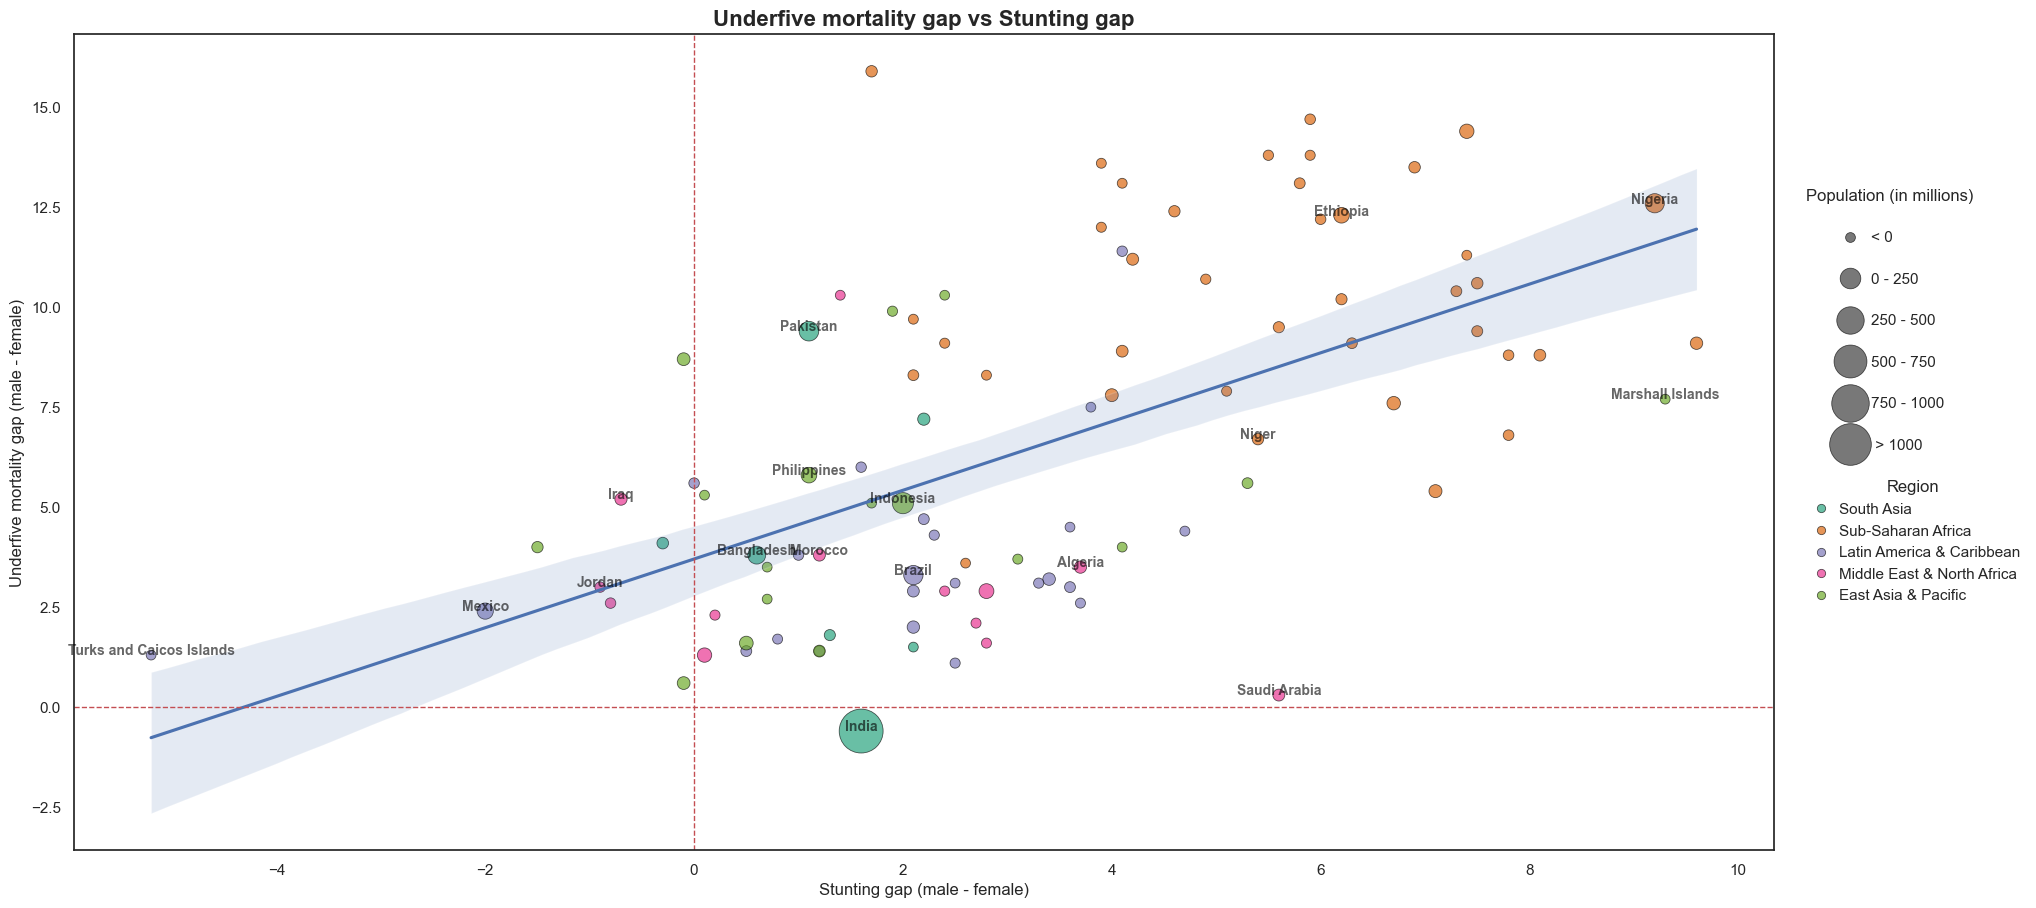

In [302]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,9))

import seaborn as sns
sns.set_theme(style="white")

# Compute qua
# Plot miles per gallon against horsepower with other semantics
sns.scatterplot(data = world_bank_df, 
                    x = 'gap_stunting', 
                    y = 'gap_underfive_mortality',
                    hue = 'Region',
                    size = 'population',
                    palette = 'Dark2',
                    sizes=(50, 1000),
                    ax=ax,
                    alpha = 0.66,
                    edgecolor = 'black' )
#ax.set_title()


#For each point, we add a text inside the bubble
#for line in range(0,world_bank_df.shape[0]):
    #ax.text(world_bank_df.gap_stunting[line], world_bank_df.gap_underfive_mortality[line], world_bank_df["Country Name"][line], horizontalalignment='center', size='medium', color='black', weight='semibold')

for line in [val for val in world_bank_df[world_bank_df["Country Name"].isin(["Bangladesh","India","Niger","Nigeria","Ethiopia","Pakistan","Algeria","Iraq","Morocco","Indonesia","Philippines","Brazil","Mexico","Turks and Caicos Islands","Saudi Arabia","Jordan","Marshall Islands"])].index]:
    ax.text(world_bank_df.gap_stunting[line], world_bank_df.gap_underfive_mortality[line], world_bank_df["Country Name"][line], horizontalalignment='center', 
            size='small', color='black', weight='bold', alpha=0.6)

# Legend split and place outside #

num_of_colors = len(world_bank_df['Region'].unique()) + 1

handles, labels = ax.get_legend_handles_labels()
color_hl = handles[1:num_of_colors], labels[1:num_of_colors]
sizes_hl = handles[1+num_of_colors:], labels[1+num_of_colors:]
#sizes_hl = handles, labels
# Call legend twice #
color_leg = ax.legend(*color_hl,
                        #labelspacing=1,
                        fancybox=False,
                        #bbox_to_anchor=(1, -0.065),
                        #ncol = 4,
                        borderaxespad  = 0., title="Region")
#color_leg.set_title("")
#ax.set_label(["<1","1-250","250-500","500-750","750-1000",">1000"])
sizes_leg = ax.legend(*sizes_hl,
                        labelspacing=1,
                        fancybox=False,
                        #bbox_to_anchor=(0.36, -0.05),
                        #ncol = 7,
                        #borderaxespad  = 0.2, 
                        title="Population (in millions)")

n_size = len(sizes_leg.get_lines())

labels_leg = ['< ' + sizes_leg.texts[0].get_text()]
#'< '+ str(sizes_leg.texts[0][2]), str(sizes_leg.texts[0][2]) + ' - ' + str(sizes_leg.texts[1][2]), str(sizes_leg.texts[1][2]) + ' - ' + str(sizes_leg.texts[2][2]), '> ' + str(rounded_quantiles[3]),
for curr in range(1,n_size - 1):
    labels_leg.append(sizes_leg.texts[curr - 1].get_text() + ' - ' + sizes_leg.texts[curr].get_text())

labels_leg.append(' > ' + sizes_leg.texts[n_size - 2].get_text())



# for line, curr_lab in zip(ax.lines[1+num_of_colors:],labels_leg):
#     line.set_label(s=curr_lab)

ax.get_legend().remove()

fig.legend(title=color_leg.get_title().get_text(), handles=color_leg.legend_handles, labels=[v.get_text() for v in color_leg.texts], bbox_to_anchor=(1, 0.5), loc='upper left', frameon=False, handletextpad=0.2, columnspacing=0.5)
fig.legend(title= sizes_leg.get_title().get_text(), handles=sizes_leg.legend_handles, labels=labels_leg, bbox_to_anchor=(1, 0.5), loc='lower left', frameon=False, handletextpad=0.4, columnspacing=0.5, labelspacing = 1.8)


#, labels=["<1","1-250","250-500","500-750","750-1000",">1000"]
# We need this because the 2nd call to legend() erases the first #
#ax.add_artist(color_leg)

# add regression line
sns.regplot(data=world_bank_df, x="gap_stunting", y="gap_underfive_mortality", scatter=False, ax=ax)

# Adjust #
plt.subplots_adjust(right=0.75)
#plt.xticks(rotation=90)
ax.axhline(0, ls='--', linewidth=1, color='r')
ax.axvline(0, ls='--', linewidth=1, color='r')
plt.tight_layout()
ax.set_title('Underfive mortality gap vs Stunting gap', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Stunting gap (male - female)')
ax.set_ylabel('Underfive mortality gap (male - female)');

plt.savefig(os.getcwd() + '\\output\\img\\mortality_stunting_gap.jpeg')

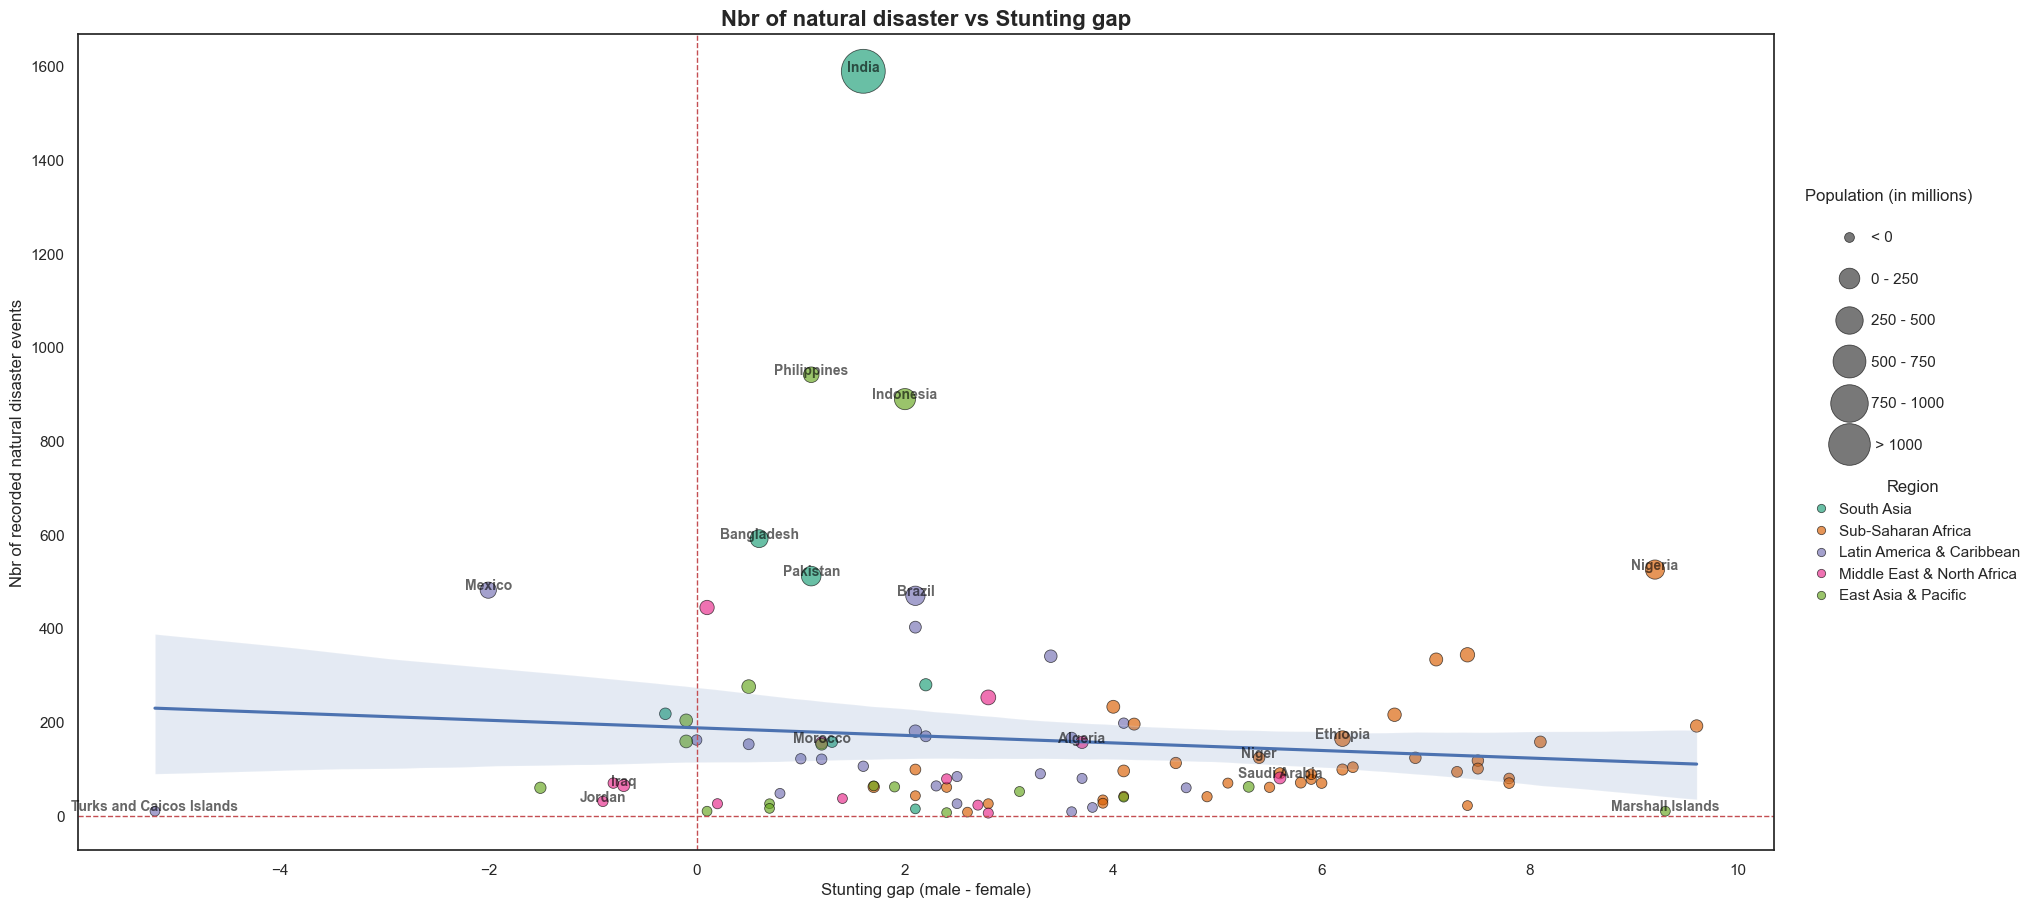

In [303]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,9))

import seaborn as sns
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.scatterplot(data = world_bank_df, 
                    x = 'gap_stunting', 
                    y = 'nbr_natural_hazard',
                    hue = 'Region',
                    size = 'population',
                    #color= 'Region',
                    #sizes = [10, 200],
                    #palette = 'viridis',
                    palette = 'Dark2',
                    sizes=(50, 1000),
                    #size_norm=(1, 6000),
                    #palette = 'viridis',
                    ax=ax,
                    alpha = 0.66,
                    edgecolor = 'black' )

#For each point, we add a text inside the bubble

for line in [val for val in world_bank_df[world_bank_df["Country Name"].isin(["Bangladesh","India","Niger","Nigeria","Ethiopia","Pakistan","Algeria","Iraq","Morocco","Indonesia","Philippines","Brazil","Mexico","Turks and Caicos Islands","Saudi Arabia","Jordan","Marshall Islands"])].index]:
    ax.text(world_bank_df.gap_stunting[line], world_bank_df["nbr_natural_hazard"][line], world_bank_df["Country Name"][line], horizontalalignment='center', 
            size='small', color='black', weight='bold', alpha=0.6)

# Legend split and place outside #
num_of_colors = len(world_bank_df['Region'].unique()) + 1

handles, labels = ax.get_legend_handles_labels()
color_hl = handles[1:num_of_colors], labels[1:num_of_colors]
sizes_hl = handles[1+num_of_colors:], labels[1+num_of_colors:]

color_leg = ax.legend(*color_hl,
                        #labelspacing=1,
                        fancybox=False,
                        #bbox_to_anchor=(1, -0.065),
                        #ncol = 4,
                        borderaxespad  = 0., title="Region")

sizes_leg = ax.legend(*sizes_hl,
                        labelspacing=1,
                        fancybox=False,
                        #bbox_to_anchor=(0.36, -0.05),
                        #ncol = 7,
                        #borderaxespad  = 0.2, 
                        title="Population (in millions)")

n_size = len(sizes_leg.get_lines())

labels_leg = ['< ' + sizes_leg.texts[0].get_text()]
#'< '+ str(sizes_leg.texts[0][2]), str(sizes_leg.texts[0][2]) + ' - ' + str(sizes_leg.texts[1][2]), str(sizes_leg.texts[1][2]) + ' - ' + str(sizes_leg.texts[2][2]), '> ' + str(rounded_quantiles[3]),
for curr in range(1,n_size - 1):
    labels_leg.append(sizes_leg.texts[curr - 1].get_text() + ' - ' + sizes_leg.texts[curr].get_text())

labels_leg.append(' > ' + sizes_leg.texts[n_size - 2].get_text())



# for line, curr_lab in zip(ax.lines[1+num_of_colors:],labels_leg):
#     line.set_label(s=curr_lab)

ax.get_legend().remove()

fig.legend(title=color_leg.get_title().get_text(), handles=color_leg.legend_handles, labels=[v.get_text() for v in color_leg.texts], bbox_to_anchor=(1, 0.5), loc='upper left', frameon=False, handletextpad=0.2, columnspacing=0.5)
fig.legend(title= sizes_leg.get_title().get_text(), handles=sizes_leg.legend_handles, labels=labels_leg, bbox_to_anchor=(1, 0.5), loc='lower left', frameon=False, handletextpad=0.4, columnspacing=0.5, labelspacing = 1.8)


#, labels=["<1","1-250","250-500","500-750","750-1000",">1000"]
# We need this because the 2nd call to legend() erases the first #
#ax.add_artist(color_leg)

# add regression line
sns.regplot(data=world_bank_df, x="gap_stunting", y="nbr_natural_hazard", scatter=False, ax=ax)

# Adjust #
plt.subplots_adjust(right=0.75)
#plt.xticks(rotation=90)
ax.axhline(0, ls='--', linewidth=1, color='r')
ax.axvline(0, ls='--', linewidth=1, color='r')
plt.tight_layout()
ax.set_title('Nbr of natural disaster vs Stunting gap', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Stunting gap (male - female)')
ax.set_ylabel('Nbr of recorded natural disaster events from 1900');

plt.savefig(os.getcwd() + '\\output\\img\\disaster_stunting_gap.jpeg')

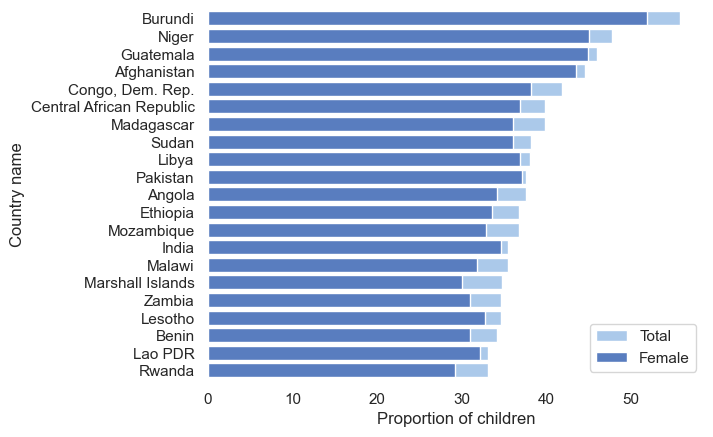

In [296]:
lst_n10largest = list(world_bank_df.sort_values(by="stunting_rate_total", ascending=False).reset_index().loc[:20,"Country Name"])

# hist_data = (
#     pd.melt(world_bank_df[["Country Name", "stunting_rate_female","stunting_rate_total"]][world_bank_df['Country Name'].isin(lst_n10largest)]
#         ,id_vars="Country Name", 
#         value_vars=["stunting_rate_female","stunting_rate_total"])
#     )

# hist_data["variable"] = hist_data["variable"].replace({"stunting_rate_male":"male","stunting_rate_female":"female","stunting_rate_total":"total"})

#sns.barplot(data=hist_data, x="Country Name", y="value", hue="variable", stacked=True)

hist_data = world_bank_df[["Country Name", "stunting_rate_total","stunting_rate_female"]][world_bank_df['Country Name'].isin(lst_n10largest)].sort_values(by="stunting_rate_total", ascending=False)

sns.set_color_codes('pastel')
sns.barplot(x = 'stunting_rate_total', y = 'Country Name', data = hist_data,
            label = 'Total', color = 'b', edgecolor = 'w')

sns.set_color_codes('muted')
sns.barplot(x = 'stunting_rate_female', y = 'Country Name', data = hist_data,
            label = 'Female', color = 'b', edgecolor = 'w')

ax.legend(ncol = 2, loc = 'lower right')
plt.xlabel('Proportion of children');
plt.ylabel('Country name');
sns.despine(left = True, bottom = True)
plt.show()

#add axis titles
#plt.xlabel('Country name');
#plt.ylabel('proportion of children');

#rotate x-axis labels
#plt.xticks(rotation=90);

In [222]:
#world_bank_df.groupby("Country Name")["stunting_rate"].nlargest(10).reset_index()


In [86]:
df_events = pd.DataFrame({
    'date':[
        #'2011-11-01', 
        '2012-03-01',
        #'2015-01-01',
        '2015-06-01',
        #'2018-11-01',
        '2018-05-01',

        '2013-03-29',
        '2016-05-21',
        '2013-05-16',
        '2015-07-29',
        '2017-05-30',
        '2007-11-15',
        '2009-05-25'
    ],
    'Events':[
        #'First round start',
        'First',
        #'Second round start',
        'Second',
        #'Third round start',
        'Third',
        'No Name',
        'Roanu',
        'Mahasen',
        'Komen',
        'Mora',
        'Sidr',
        'Aila'],

    'Nbr_Affected':[

        np.NAN,
        np.NAN,
        np.NAN,
        25020,
        1203555,
        1498644,
        2600000,
        3300012,
        8978541,
        3935341
        ], 
        'Affected_district':[
            #'','','',
            '','','',
            'Natore, Naogaon',
            'Barisal, Noakhali, Lakshmipur, Chandpur, Cox’s Bazar, Bhola, Barguna, Patuakhali',
            'Patuakhali, Bhola, Barguna districts',
            'Cox’s Bazar, Chittagong, Noakhali, Feni, Bandarban, Patuakhali, Bhola, Barguna districts',
            'Swandip, Anwara, Lohogara, Bashkhali, Sitakunda, Mirsarai, Chandanaish, Karnaphuli Thana, Cohokoria, Teknaf, Moheshkhali, Kutubdia, Pekua, Ramu, Ukhiya, Shah Parir Dwip, Cox’s Bazar district, Rangamati district, Nikonchori, Bhola district, Khagrachhari, Feni, Noakhali',
            'Bagerhat, Khulna, Satkhira, Patuakhali, Barguna, Pirojpur, Barisal, Jhalokati, Bhola, Madaripur, Gopalganj, Shariatpur districts',
            'Khulna, Satkhira, Jessore, Bagerhat, Patuakhali, Bhola, Barisal, Barguna, Pirojpur, Jhalokati districts, Lakshmipur, Chittagong, Noakhali, Cox’s Bazar, Feni, Chandpur'],
            
            'type':[
                'Survey',
                'Survey',
                'Survey',
                'TCA',
                'TCA',
                'TCA',
                'TCA',
                'TCA',
                'TCO',
                'TCO'
            ]
})


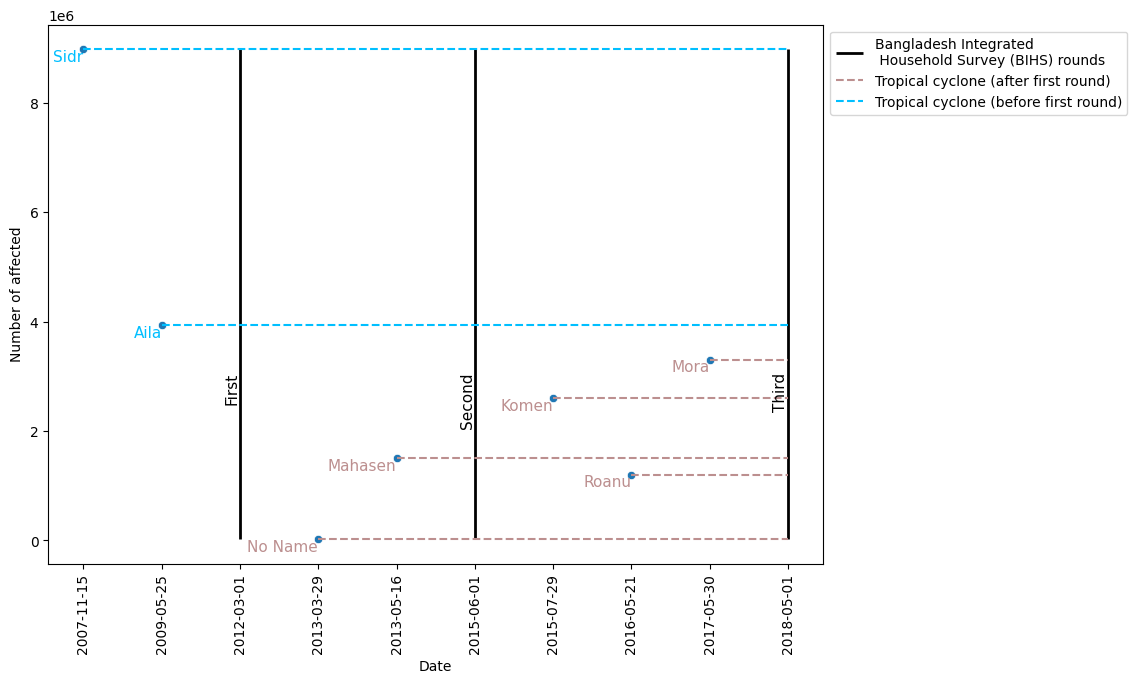

In [89]:

plt.figure(figsize=(10, 7))
# sort, then reset index
df_events = df_events.sort_values('date', ascending = True).reset_index(drop=True)

ax = sns.scatterplot(x=df_events.date, y=df_events.Nbr_Affected)
ax.set_xlabel("Date")
ax.set_ylabel("Number of affected")
ax.tick_params(axis='x', labelrotation = 90)

#plt.scatter(df.index, df.Nbr_Affected)
ax.vlines(x=df_events.loc[df_events['type']=='Survey'].date,ymin=df_events.Nbr_Affected.min(), ymax=df_events.Nbr_Affected.max(), color='k', ls='-', lw=2, label='Bangladesh Integrated \n Household Survey (BIHS) rounds')
for i in df_events.loc[df_events['type']=='Survey'].index.values:
    ax.text(x=df_events.loc[i,'date'],y=df_events.Nbr_Affected.mean(),s=df_events.loc[i,'Events'], color='k', ha='right', va='top', rotation=90, fontsize=11)

ax.hlines(y=df_events.loc[df_events['type']=='TCA'].Nbr_Affected,xmin=df_events.loc[df_events['type']=='TCA'].date,xmax=df_events.date.max(), color='rosybrown', ls='--', label='Tropical cyclone (after first round)')
for i in df_events.loc[df_events['type']=='TCA'].index.values:
    ax.text(x=df_events.loc[i,'date'],y=df_events.loc[i,'Nbr_Affected'],s=df_events.loc[i,'Events'], color='rosybrown', ha='right', va='top', rotation=0, fontsize=11)

ax.hlines(y=df_events.loc[df_events['type']=='TCO'].Nbr_Affected,xmin=df_events.loc[df_events['type']=='TCO'].date,xmax=df_events.date.max(), color='deepskyblue', ls='--', label='Tropical cyclone (before first round)')
for i in df_events.loc[df_events['type']=='TCO'].index.values:
    ax.text(x=df_events.loc[i,'date'],y=df_events.loc[i,'Nbr_Affected'],s=df_events.loc[i,'Events'], color='deepskyblue', ha='right', va='top', rotation=0, fontsize=11)

# # # place the legend outside
ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

# saving the file
filename = 'BIHS_rounds_and_date'
plt.savefig( os.getcwd() + '\\output\\img\\' + filename+'.jpeg')

### Plotting graph

In [7]:
# Creating the IDs for joining 
bgd_adm["ID"] = bgd_adm["ID_1"].astype("str") + bgd_adm["ID_2"].astype("str")
bgd_adm["ID"] = bgd_adm["ID"].astype("str")

nbr_affected_list = dmg_roanu["Affected people"].values.tolist() + dmg_komen["Affected people"].values.tolist() + dmg_mora["Affected people"].values.tolist()


In [8]:

quantiles = np.quantile(nbr_affected_list, [i * 0.25 for i in range(5)])
rounded_quantiles = [int(i) for i in np.around(quantiles, -1).tolist()]

qlabels = [
    '< '+ str(rounded_quantiles[1]), str(rounded_quantiles[1]) + ' - ' + str(rounded_quantiles[2]), str(rounded_quantiles[2]) + ' - ' + str(rounded_quantiles[3]), '> ' + str(rounded_quantiles[3]),
]

In [9]:
# Explicitly specifying the columns for joining
dmg_roanu = bgd_adm.merge(dmg_roanu, left_on='ID', right_on='ID_adm', how='left')
dmg_komen = bgd_adm.merge(dmg_komen, left_on='ID', right_on='ID_adm', how='left')
dmg_mora = bgd_adm.merge(dmg_mora, left_on='ID', right_on='ID_adm', how='left')

# Replace Nan by 0
#dmg_roanu["Affected people"] = dmg_roanu["Affected people"].fillna(0)
#dmg_komen["Affected people"] = dmg_komen["Affected people"].fillna(0)
#dmg_mora["Affected people"] = dmg_mora["Affected people"].fillna(0)

# Create a new column for the categorical column mentioned above
dmg_roanu['Affected_people_quartile'] = pd.cut(dmg_roanu['Affected people'], bins=rounded_quantiles, labels=qlabels,  ordered=True, include_lowest=True)
dmg_komen['Affected_people_quartile'] = pd.cut(dmg_komen['Affected people'], bins=rounded_quantiles, labels=qlabels,  ordered=True, include_lowest=True)
dmg_mora['Affected_people_quartile'] = pd.cut(dmg_mora['Affected people'], bins=rounded_quantiles, labels=qlabels,  ordered=True, include_lowest=True)

# Sorting 
dmg_roanu.sort_values(by='Affected people', inplace=True, ascending=True)
dmg_komen.sort_values(by='Affected people', inplace=True, ascending=True)
dmg_mora.sort_values(by='Affected people', inplace=True, ascending=True)

# Creating color palette

affected_palette = {'< 22960': '#fff5f0', '22960 - 68210': '#fca082', '68210 - 169450' : '#e32f27', '> 169450': '#67000d', 'NaN':'lightgrey'}


<Axes: >

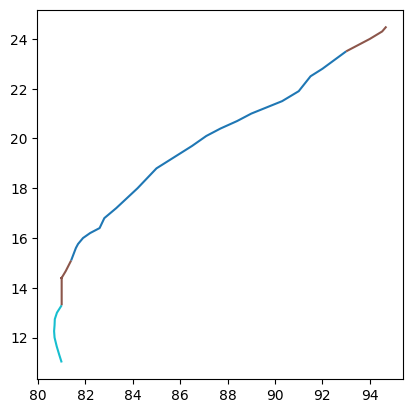

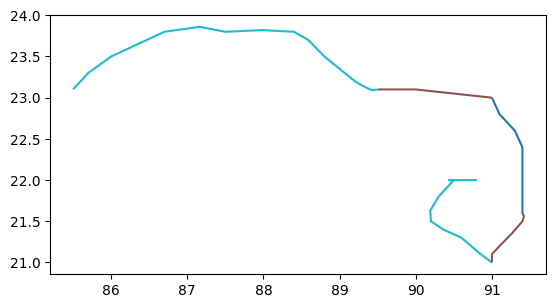

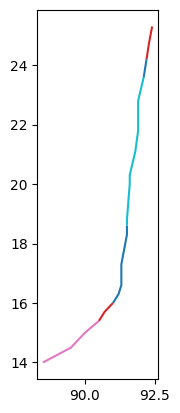

In [11]:
# Create a GeoDataFrame from `path_roanu`, `path_komen`, `path_mora`, setting the geometry to points from longitude and latitude columns,
# and specifying the coordinate reference system (CRS) as EPSG:4326 (WGS 84).
path_roanu = gpd.GeoDataFrame(path_roanu, geometry=gpd.points_from_xy(path_roanu["NEWDELHI LON"], path_roanu["NEWDELHI LAT"]), crs="EPSG:4326")
path_komen = gpd.GeoDataFrame(path_komen, geometry=gpd.points_from_xy(path_komen["NEWDELHI LON"], path_komen["NEWDELHI LAT"]), crs="EPSG:4326")
path_mora = gpd.GeoDataFrame(path_mora, geometry=gpd.points_from_xy(path_mora["NEWDELHI LON"], path_mora["NEWDELHI LAT"]), crs="EPSG:4326")
# Remove rows where the 'NEWDELHI GRADE' column has NaN values.
path_roanu = path_roanu.dropna(subset=['NEWDELHI GRADE'], axis=0)
path_komen = path_komen.dropna(subset=['NEWDELHI GRADE'], axis=0)
path_mora = path_mora.dropna(subset=['NEWDELHI GRADE'], axis=0)


# Create a new column 'Grade' in `path_roanu` based on the values in the 'NEWDELHI GRADE' column,
# mapping them to descriptive intensity categories.
path_roanu["Grade"] = np.where(path_roanu["NEWDELHI GRADE"] == "D", "Depression (17<= W <28)",
                        np.where(path_roanu["NEWDELHI GRADE"] == "DD", "Deep Depression (28<= W <34)",
                                np.where(path_roanu["NEWDELHI GRADE"] == "CS", "Cyclonic Storm (34<= W <48)",
                                        np.where(path_roanu["NEWDELHI GRADE"] == "SCS", "Severe Cyclonic Storm (48<= W <64)",
                                                np.where(path_roanu["NEWDELHI GRADE"] == "VSCS", "Very Severe Cyclonic Storm (64<= W <120)",
                                                        np.where(path_roanu["NEWDELHI GRADE"] == "SCS", "Super Cyclonic Storm (W >=120)", "No defini"))))))

path_komen["Grade"] = np.where(path_komen["NEWDELHI GRADE"] == "D", "Depression (17<= W <28)",
                        np.where(path_komen["NEWDELHI GRADE"] == "DD", "Deep Depression (28<= W <34)",
                                np.where(path_komen["NEWDELHI GRADE"] == "CS", "Cyclonic Storm (34<= W <48)",
                                        np.where(path_komen["NEWDELHI GRADE"] == "SCS", "Severe Cyclonic Storm (48<= W <64)",
                                                np.where(path_komen["NEWDELHI GRADE"] == "VSCS", "Very Severe Cyclonic Storm (64<= W <120)",
                                                        np.where(path_komen["NEWDELHI GRADE"] == "SCS", "Super Cyclonic Storm (W >=120)", "No defini"))))))

path_mora["Grade"] = np.where(path_mora["NEWDELHI GRADE"] == "D", "Depression (17<= W <28)",
                        np.where(path_mora["NEWDELHI GRADE"] == "DD", "Deep Depression (28<= W <34)",
                                np.where(path_mora["NEWDELHI GRADE"] == "CS", "Cyclonic Storm (34<= W <48)",
                                        np.where(path_mora["NEWDELHI GRADE"] == "SCS", "Severe Cyclonic Storm (48<= W <64)",
                                                np.where(path_mora["NEWDELHI GRADE"] == "VSCS", "Very Severe Cyclonic Storm (64<= W <120)",
                                                        np.where(path_mora["NEWDELHI GRADE"] == "SCS", "Super Cyclonic Storm (W >=120)", "No defini"))))))

grade_palette = {'Depression (17<= W <28)': '#440154', 'Deep Depression (28<= W <34)': '#31688e', 'Cyclonic Storm (34<= W <48)' : '#35b779', 
                'Severe Cyclonic Storm (48<= W <64)': '#fde725'}

# Group the GeoDataFrame by 'PART' and create a LineString for each group of points.
# This treats each group of points as a line representing the path of the cyclone.
lines_roanu = path_roanu.groupby(['PART'])['geometry'].apply(lambda x: LineString(x.tolist()))
lines_komen = path_komen.groupby(['PART'])['geometry'].apply(lambda x: LineString(x.tolist()))
lines_mora = path_mora.groupby(['PART'])['geometry'].apply(lambda x: LineString(x.tolist()))

# Convert the resulting series of LineStrings into a new GeoDataFrame, keeping the same CRS.
# The 'PART' column is added back as a regular column, not an index.
lines_roanu = gpd.GeoDataFrame(lines_roanu, geometry='geometry', crs="EPSG:4326")
lines_komen = gpd.GeoDataFrame(lines_komen, geometry='geometry', crs="EPSG:4326")
lines_mora = gpd.GeoDataFrame(lines_mora, geometry='geometry', crs="EPSG:4326")

lines_roanu.reset_index(inplace=True)
lines_komen.reset_index(inplace=True)
lines_mora.reset_index(inplace=True)
# Create a 'Grade' column in the new GeoDataFrame by extracting the 'Grade' value from the first point
# of each 'PART' in the original `path_roanu` DataFrame.
lines_roanu["Grade"] = [path_roanu[path_roanu.PART == i].reset_index().loc[0, 'Grade'] for i in lines_roanu.PART.values]
lines_komen["Grade"] = [path_komen[path_komen.PART == i].reset_index().loc[0, 'Grade'] for i in lines_komen.PART.values]
lines_mora["Grade"] = [path_mora[path_mora.PART == i].reset_index().loc[0, 'Grade'] for i in lines_mora.PART.values]

# Plot the GeoDataFrame, coloring the lines by the 'Grade' column to visualize the intensity of each segment.
lines_roanu.plot(column='Grade')
lines_komen.plot(column='Grade')
lines_mora.plot(column='Grade')


In [12]:
lines_roanu=lines_roanu.reset_index().sort_values(by="Grade")
lines_komen=lines_komen.reset_index().sort_values(by="Grade")
lines_mora=lines_mora.reset_index().sort_values(by="Grade")

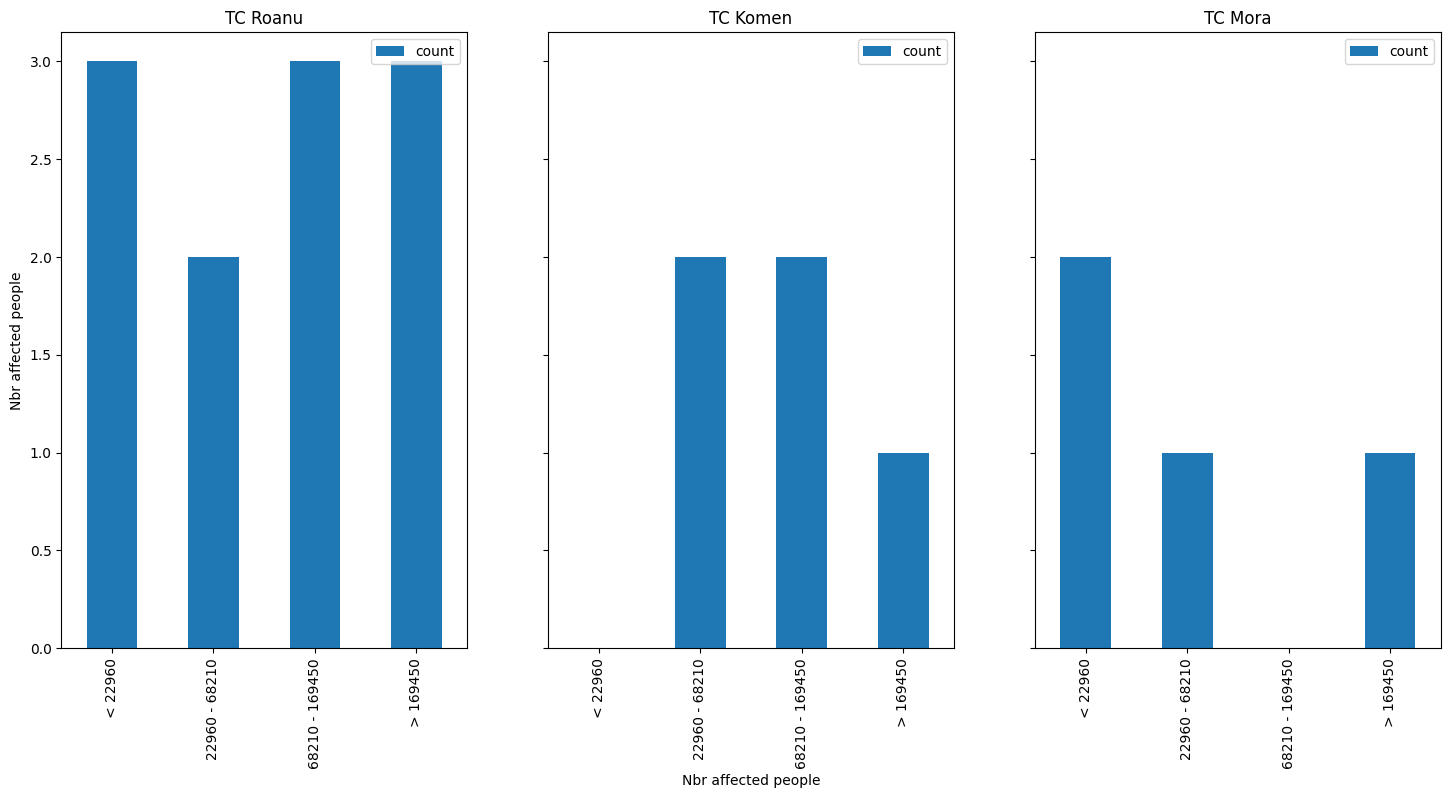

In [13]:
# np.quantile(nbr_affected_list,[i * 0.25 for i in range(4)]).tolist().around(0)
# np.quantile(nbr_affected_list,[i * 0.25 for i in range(4)]).tolist()
# Plotting the categorical data for checking
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(17.8,8),sharex=True, sharey=True)
dmg_roanu['Affected_people_quartile'].value_counts().sort_index().plot(kind='bar', xlabel='', ylabel='Nbr affected people', rot=45, legend=True, ax=ax[0])
dmg_komen['Affected_people_quartile'].value_counts().sort_index().plot(kind='bar', xlabel='Nbr affected people', ylabel='', rot=45, legend=True, ax=ax[1])
dmg_mora['Affected_people_quartile'].value_counts().sort_index().plot(kind='bar', xlabel='', ylabel='', rot=45, legend=True, ax=ax[2])

# fig.text(0.5, 0, 'Nbr affected people', ha='center')
# fig.text(0, 0.5, 'Nbr districts', va='center', rotation='vertical')

ax[0].tick_params(axis='x', labelrotation = 90)
ax[1].tick_params(axis='x', labelrotation = 90)
ax[2].tick_params(axis='x', labelrotation = 90)

ax[0].set_title("TC Roanu")
ax[1].set_title("TC Komen")
ax[2].set_title("TC Mora")



# Adjusting the sub-plots 
plt.subplots_adjust(right=0.9) 

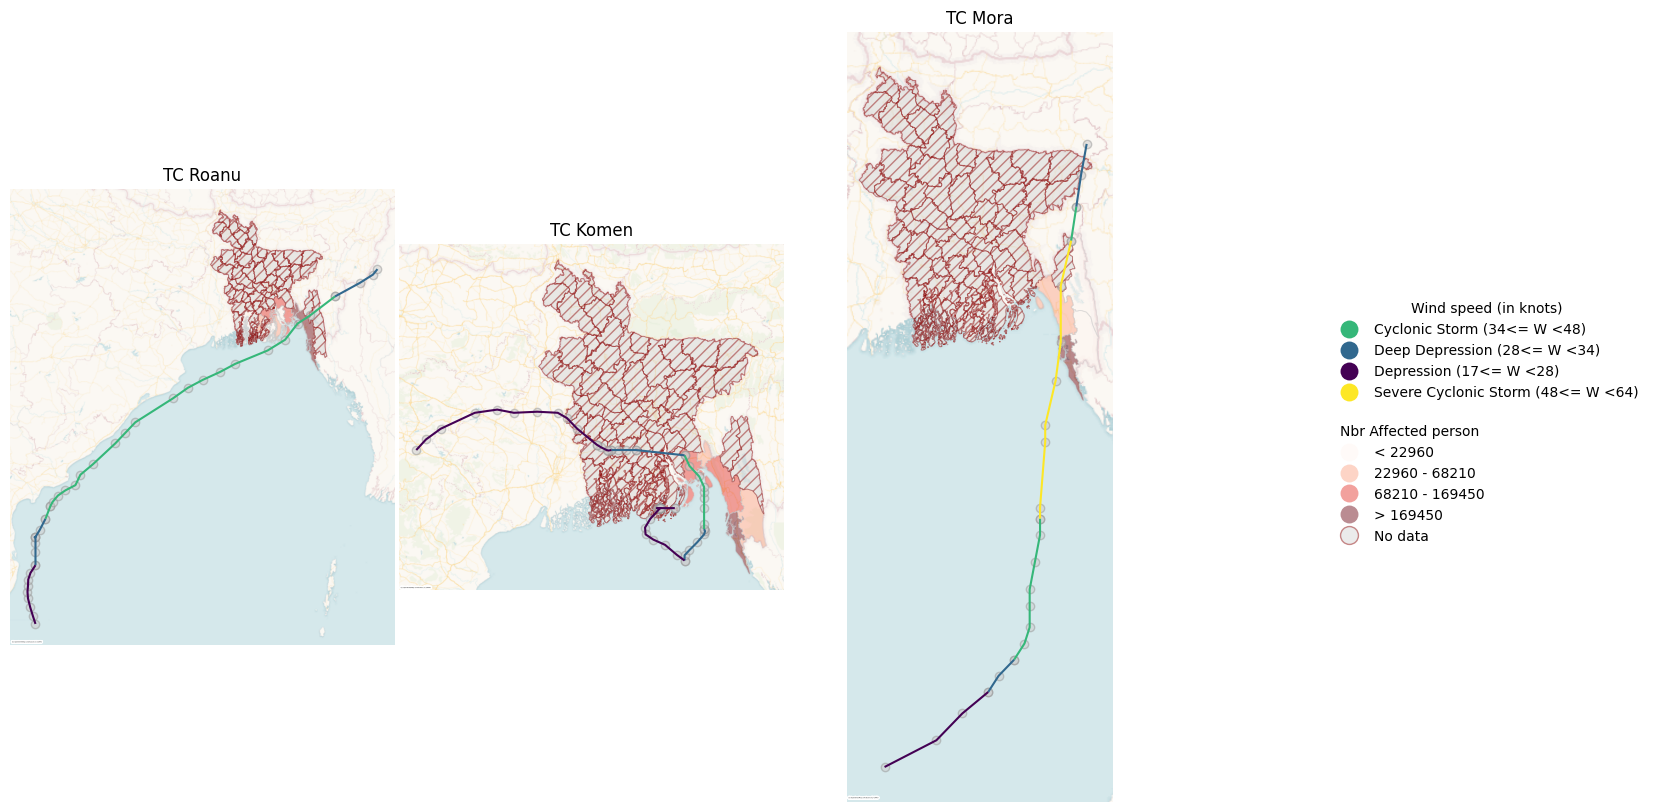

In [71]:

# Représentation graphique des regions du Bangladesh
## fig et ax représentent la base de la carte
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,10), sharex=False, sharey=False)
#dmg_roanu.apply(lambda x: ax.annotate(text=x['NAME_2'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)
color_steps_adm = plt.colormaps['Greys'].resampled(4)
#color_steps_adm = ['light-gray','dark-gray','gray','black']plt.colormaps['Greys'].resampled(4)
color_steps_path = plt.colormaps['rocket'].resampled(4) 
# bgd_plot=dmg_roanu.plot(ax=ax, lw=0.7, alpha=0.45,column="Affected_people_quartile", scheme='User_Defined', missing_kwds=dict(color='white'), classification_kwds=dict(bins=rounded_quantiles), cmap=cmap, edgecolor='0.8', legend=True, legend_kwds={"loc": "upper left", "bbox_to_anchor": (0, 0.15), 
#                         'markerscale':1.29,'title_fontsize':'medium', 'fontsize':'small', "interval": False, "title":"Affected hh","title_fontsize":"medium"})





dmg_roanu.to_crs('EPSG:3857').plot(ax=ax[0], lw=0.7, alpha=0.45,column="Affected_people_quartile",categorical=True, missing_kwds={"color": "lightgrey","edgecolor": "darkred","hatch": "///","label": "No data"}, cmap=plt.colormaps['Reds'].resampled(4), edgecolor='0.8', legend=False, legend_kwds={"loc": "lower left",  'markerscale':1.29, 'title':'Nbr Affected person','title_fontsize':'medium', 'fontsize':'small'})
dmg_komen.to_crs('EPSG:3857').plot(ax=ax[1], lw=0.7, alpha=0.45,column="Affected_people_quartile",categorical=True, missing_kwds={"color": "lightgrey","edgecolor": "darkred","hatch": "///","label": "No data"}, cmap=plt.colormaps['Reds'].resampled(4), edgecolor='0.8', legend=False, legend_kwds={"loc": "lower left",  'markerscale':1.29, 'title':'Nbr Affected person','title_fontsize':'medium', 'fontsize':'small'})
dmg_mora.to_crs('EPSG:3857').plot(ax=ax[2], lw=0.7, alpha=0.45,column="Affected_people_quartile",categorical=True, missing_kwds={"color": "lightgrey","edgecolor": "darkred","hatch": "///","label": "No data"}, cmap=plt.colormaps['Reds'].resampled(4), edgecolor='0.8', legend=True, legend_kwds={"loc": "lower left",  'markerscale':1.29, 'title':'Nbr Affected person','title_fontsize':'medium', 'fontsize':'small'})
# "bbox_to_anchor": (0.3, 0.15),
# need to add existing legend back
leg1 = ax[2].get_legend()

path_roanu.to_crs('EPSG:3857').plot(ax=ax[0], facecolor='#cccccc', edgecolor='#969696', alpha=0.5, legend=False)
path_komen.to_crs('EPSG:3857').plot(ax=ax[1], facecolor='#cccccc', edgecolor='#969696', alpha=0.5, legend=False)
path_mora.to_crs('EPSG:3857').plot(ax=ax[2], facecolor='#cccccc', edgecolor='#969696', alpha=0.5, legend=False)

lines_roanu.to_crs('EPSG:3857').plot(column='Grade', ax=ax[0], categorical=True, legend=False,cmap=mplt.colors.ListedColormap([grade_palette[b] for b in lines_roanu["Grade"].unique()]), legend_kwds={"loc": "lower center", 'markerscale':1.29, 'title':'Wind speed (in knots)','title_fontsize':'medium', 'fontsize':'small', "title_fontsize":"medium"})
lines_komen.to_crs('EPSG:3857').plot(column='Grade', ax=ax[1], categorical=True, legend=False,cmap=mplt.colors.ListedColormap([grade_palette[b] for b in lines_komen["Grade"].unique()]), legend_kwds={"loc": "lower center", 'markerscale':1.29, 'title':'Wind speed (in knots)','title_fontsize':'medium', 'fontsize':'small', "title_fontsize":"medium"})
lines_mora.to_crs('EPSG:3857').plot(column='Grade', ax=ax[2], categorical=True, legend=True,cmap=mplt.colors.ListedColormap([grade_palette[b] for b in lines_mora["Grade"].unique()]), legend_kwds={"loc": "lower center", 'markerscale':1.29, 'title':'Wind speed (in knots)','title_fontsize':'medium', 'fontsize':'small', "title_fontsize":"medium"})

# Extract the legend handles and labels from the third subplot
#handles, labels = ax[2].get_legend_handles_labels()


# extract the legend from an axes - used the last axes for the smaller sample data
leg2 = ax[2].get_legend()
# extract the handles
handles = leg1.legend_handles + leg2.legend_handles
# get the label text
labels = [v.get_text() for v in leg1.texts + leg2.texts]
# get the title text
title = leg1.get_title().get_text() + leg2.get_title().get_text()

# Add the common legend to the figure
#fig.legend(handles, labels, loc='upper center', ncol=3)

# Sets figure limits
#ax[0].set_xlim(87, 95);
#ax[1].set_xlim(87, 95);
#ax[2].set_xlim(87, 95);

#ax[0].set_ylim(20, 27);
#ax[1].set_ylim(20, 27);
#ax[2].set_ylim(20, 27);

# Add base map
cx.add_basemap(ax[0],  source=cx.providers.CartoDB.VoyagerNoLabels, attribution = None, attribution_size=0)
cx.add_basemap(ax[1],  source=cx.providers.CartoDB.VoyagerNoLabels, attribution = None, attribution_size=0)
cx.add_basemap(ax[2],  source=cx.providers.CartoDB.VoyagerNoLabels, attribution = None, attribution_size=0)


# Sets figure limits
#ax.set_xlim(87, 95);
#ax.set_ylim(20, 27);


# Sans axe 
#ax.axis('off')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
# using set_facecolor() method
#ax.set_facecolor("white")
ax[0].set_facecolor("white")
ax[1].set_facecolor("white")
ax[2].set_facecolor("white")
# Set title and legend title

ax[0].title.set_text("TC Roanu")
ax[1].title.set_text("TC Komen")
ax[2].title.set_text("TC Mora")
#ax = bgd_adm.to_crs('EPSG:3857').plot(figsize=(9, 9),facecolor="none",  linewidth=0.5)

# Removes ticks and lat/lon labels
ax[0].tick_params(axis='both', bottom=False, left=False,labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', bottom=False, left=False,labelbottom=False, labelleft=False)
ax[2].tick_params(axis='both', bottom=False, left=False,labelbottom=False, labelleft=False)

# Place a legend to the right of this smaller subplot.
#ax[2].legend(bbox_to_anchor=(0., 1.02, 2.2, .102), loc=1, ncol=3, mode="expand", borderaxespad=0)

fig.legend(title=leg1.get_title().get_text(), handles=leg1.legend_handles, labels=[v.get_text() for v in leg1.texts], bbox_to_anchor=(1, 0.5), loc='upper left', frameon=False)
fig.legend(title= leg2.get_title().get_text(), handles=leg2.legend_handles, labels=[v.get_text() for v in leg2.texts], bbox_to_anchor=(1, 0.5), loc='lower left', frameon=False)

ax[2].get_legend().remove()
fig.subplots_adjust(wspace=0.01, hspace=0.5)
# Rajouter les coordonnées GPS des points sur la carte
#csm = path_roanu.plot(ax=bgd_plot, column="NATURE", facecolor='#cccccc', edgecolor='#969696', alpha=0.5, legend=True)

plt.savefig(os.getcwd() + '\\output\\img\\cyclone by name.jpeg', bbox_inches='tight')



In [ ]:
#fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
#dmg_roanu.apply(lambda x: ax.annotate(text=x['NAME_2'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)
color_steps_adm = plt.colormaps['Greys'].resampled(4)
#color_steps_adm = ['light-gray','dark-gray','gray','black']plt.colormaps['Greys'].resampled(4)
color_steps_path = plt.colormaps['rocket'].resampled(4) 
# bgd_plot=dmg_roanu.plot(ax=ax, lw=0.7, alpha=0.45,column="Affected_people_quartile", scheme='User_Defined', missing_kwds=dict(color='white'), classification_kwds=dict(bins=rounded_quantiles), cmap=cmap, edgecolor='0.8', legend=True, legend_kwds={"loc": "upper left", "bbox_to_anchor": (0, 0.15), 
#                         'markerscale':1.29,'title_fontsize':'medium', 'fontsize':'small', "interval": False, "title":"Affected hh","title_fontsize":"medium"})

#plt_dmg = dmg_roanu.plot(ax=ax, lw=0.7, alpha=0.45,column="Affected_people_quartile",categorical=True, missing_kwds={"color": "lightgrey","edgecolor": "darkred","hatch": "///","label": "No data"}, cmap=plt.get_cmap('Reds', 4), edgecolor='0.8', legend=True, legend_kwds={"loc": "lower left",  'markerscale':1.29, 'title':'Nbr Affected person','title_fontsize':'medium', 'fontsize':'small', "title_fontsize":"medium"})
# "bbox_to_anchor": (0.3, 0.15),
# need to
# we are using an extent around Mexico for the examples
extent = (2000000, 270000, 1800000, 3800000)
#Now adding in the basemap imagery
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis(extent)
cx.add_basemap(ax, zoom=8)

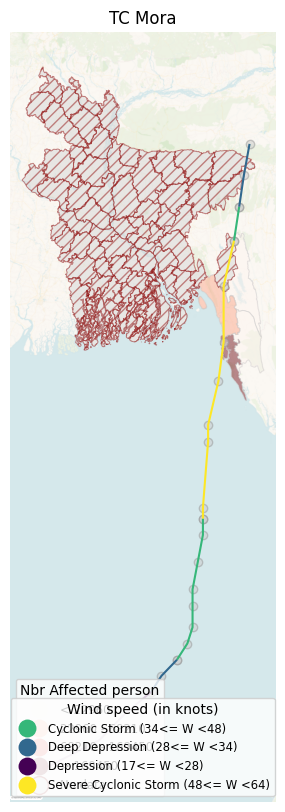

In [78]:
ax = dmg_mora.to_crs('EPSG:3857').plot(figsize=(15,10), lw=0.7, alpha=0.45,column="Affected_people_quartile",categorical=True, missing_kwds={"color": "lightgrey","edgecolor": "darkred","hatch": "///","label": "No data"}, cmap=plt.get_cmap('Reds', 4), edgecolor='0.8', legend=True, legend_kwds={"loc": "lower left",  'markerscale':1.29, 'title':'Nbr Affected person','title_fontsize':'medium', 'fontsize':'small', "title_fontsize":"medium"})

# need to add existing legend back
leg1 = ax.get_legend()


path_mora.to_crs('EPSG:3857').plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5, legend=False)
lines_mora.to_crs('EPSG:3857').plot(column='Grade', ax=ax, categorical=True, legend=True,cmap=mplt.colors.ListedColormap([grade_palette[b] for b in lines_mora["Grade"].unique()]), legend_kwds={"loc": "lower center", 'markerscale':1.29, 'title':'Wind speed (in knots)','title_fontsize':'medium', 'fontsize':'small', "title_fontsize":"medium"})


# extract the legend from an axes - used the last axes for the smaller sample data
ax.add_artist(leg1)
#leg2 = ax.get_legend()


cx.add_basemap(ax,  source=cx.providers.CartoDB.VoyagerNoLabels, zoom=10, attribution = None, attribution_size=0)
ax.axis("off")

ax.title.set_text("TC Mora")

#fig.legend(title=leg1.get_title().get_text(), handles=leg1.legend_handles, labels=[v.get_text() for v in leg1.texts], bbox_to_anchor=(1, 0.5), loc='lower center', frameon=False)
#fig.legend(title= leg2.get_title().get_text(), handles=leg2.legend_handles, labels=[v.get_text() for v in leg2.texts], bbox_to_anchor=(1, 0.5), loc='lower left', frameon=False)

#ax[2].get_legend().remove()
#fig.subplots_adjust(wspace=0.01, hspace=0.5)
# Rajouter les coordonnées GPS des points sur la carte
#csm = path_roanu.plot(ax=bgd_plot, column="NATURE", facecolor='#cccccc', edgecolor='#969696', alpha=0.5, legend=True)

plt.savefig(os.getcwd() + '\\output\\img\\cyclone mora.jpeg', bbox_inches='tight')

## Wolrd bank plot